In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
plt.rcParams['figure.figsize'] = (8,6)
plt.style.use("ggplot")

import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [34]:
box = pd.read_csv("C:/Users/gabbe/Downloads/envs/boxing/csv-files/boxers.csv")
box.head()

,Unnamed: 0,alias,birth name,birth place,born,bouts,br_id,career,debut,division,...,nationality,promoter,reach,residence,rounds,sex,stance,status,titles held,wins
0,0,NaN,NaN,NaN,1987-08-23 / age 32,25,336398,NaN,2005-10-29,light,...,Mexico,NaN,NaN,"La Paz, Baja California Sur, Mexico",104,male,NaN,NaN,NaN,15
1,1,NaN,NaN,"Baja California Sur, Mexico",1994-11-30 / age 25,9,800136,NaN,2016-12-17,feather,...,Mexico,NaN,NaN,"La Paz, Baja California Sur, Mexico",29,male,NaN,NaN,NaN,4
2,2,NaN,NaN,NaN,1998-05-09 / age 21,17,641426,NaN,2012-07-27,feather,...,Mexico,NaN,NaN,"La Paz, Baja California Sur, Mexico",64,male,NaN,NaN,NaN,4
3,3,NaN,NaN,NaN,NaN,1,909865,NaN,2019-11-30,super welter,...,NaN,NaN,NaN,"La Paz, Baja California Sur, Mexico",4,male,NaN,NaN,NaN,1
4,4,NaN,NaN,NaN,NaN,7,744390,NaN,2015-11-14,feather,...,Mexico,NaN,NaN,"La Paz, Baja California Sur, Mexico",29,male,NaN,NaN,NaN,2


In [35]:
bouts = pd.read_csv("C:/Users/gabbe/Downloads/envs/boxing/csv-files/bouts.csv")
bouts.head()

,Unnamed: 0,date,decision,opponent,opponent_0,opponent_0_br_id,opponent_br_id,result,title_fight,venue,w-l-d
0,0,2019-10-11,L,Roberto Ramirez*,Luis Enrique Luna,336398,501818,TKO,False,"Gimnasio Burocratas, Tijuana",21 2 1
1,1,2019-09-13,L,Juan Garcia Mendez,Luis Enrique Luna,336398,493038,RTD,False,"Centro Recreativo Juventud 2000 , Mexicali",19 4 2
2,2,2019-08-17,W,Giovany Morales Santos,Luis Enrique Luna,336398,731087,MD,False,"Cancha Manuel Gómez Jiménez, La Paz",0 5 0
3,3,2019-02-02,W,Manuel David Lugo,Luis Enrique Luna,336398,474319,SD,False,"Cancha Manuel Gómez Jiménez, La Paz",11 6 2
4,4,2018-12-14,W,Gonzalo Paul Gonzalez,Luis Enrique Luna,336398,843176,UD,False,"Cancha Manuel Gómez Jiménez, La Paz",1 0 0


In [36]:
fights = pd.merge(bouts, box, how='inner', left_on='opponent_br_id', right_on='br_id')

In [37]:
fights.y = fights.copy()

fights.y = fights[['opponent_br_id','born','debut','stance','nationality','height']].drop_duplicates()

fights = pd.merge(fights, fights.y, how='inner', left_on=fights['opponent_0_br_id'], right_on=fights.y['opponent_br_id'])
fights = fights.drop_duplicates()
fights.shape

(37503, 43)

In [38]:
fights2 = pd.merge(bouts, box, how='outer', left_on='opponent_0_br_id', right_on='br_id')

fights2.shape

(180954, 36)

In [39]:
na_cols =((fights.isnull().sum()/len(fights))*100).round(2).sort_values(ascending=False)
na_cols = pd.DataFrame(na_cols,columns = ['Missing values %'])

def applycolor(cols):
    return ['background-color: red' if 70 <= x
                else 'background-color: default' for x in cols]    

na_cols.style.apply(applycolor, axis=0)

,Missing values %
career,100.000000
promoter,100.000000
titles held,100.000000
status,100.000000
birth name,99.370000
manager/agent,95.010000
reach,85.670000
alias,73.470000
height_y,49.700000
height_x,49.440000


In [40]:
fights.drop(['titles held', 
                'status', 
               'career', 
               'promoter', 
               'birth name', 
               'manager/agent',
               'alias',
               'Unnamed: 0_x',
               'Unnamed: 0_y',
               'opponent',
               'opponent_0',
               'name',
               'sex',
               'residence',
               'venue',
               'br_id',
               'reach'
               ],axis=1,inplace=True)

In [41]:
fights = fights.drop(["key_0","opponent_0_br_id","title_fight","birth place","rounds"],axis=1)

fights.head()

,date,decision,opponent_br_id_x,result,w-l-d,born_x,bouts,debut_x,division,draws,...,losses,nationality_x,stance_x,wins,opponent_br_id_y,born_y,debut_y,stance_y,nationality_y,height_y
0,2019-10-11,L,501818,TKO,21 2 1,1993-01-19 / age 26,25,2011-12-03,light,1,...,2,Mexico,orthodox,22,336398,1987-08-23 / age 32,2005-10-29,NaN,Mexico,NaN
1,2019-08-17,W,731087,MD,0 5 0,1996-11-21 / age 23,6,2015-05-30,light,0,...,6,Mexico,NaN,0,336398,1987-08-23 / age 32,2005-10-29,NaN,Mexico,NaN
2,2019-02-02,W,474319,SD,11 6 2,1990-06-26 / age 29,25,2008-08-30,bantam,2,...,10,Mexico,NaN,12,336398,1987-08-23 / age 32,2005-10-29,NaN,Mexico,NaN
3,2008-06-14,L,392248,UD,11 0 0,1988-02-20 / age 31,54,2007-04-27,super light,1,...,14,Mexico,orthodox,39,336398,1987-08-23 / age 32,2005-10-29,NaN,Mexico,NaN
4,2013-07-13,W,501818,SD,8 0 0,1993-01-19 / age 26,25,2011-12-03,light,1,...,2,Mexico,orthodox,22,625947,1995-11-09 / age 24,2012-07-27,orthodox,Mexico,5′ 10½″ / 179cm


In [42]:
na_cols =((fights.isnull().sum()/len(fights))*100).round(2).sort_values(ascending=False)
na_cols = pd.DataFrame(na_cols,columns = ['Missing values %'])
na_cols

,Missing values %
height_y,49.70
height_x,49.44
born_x,36.24
born_y,36.07
stance_y,34.42
stance_x,34.41
nationality_y,6.98
nationality_x,6.98
result,1.13
debut_x,0.58


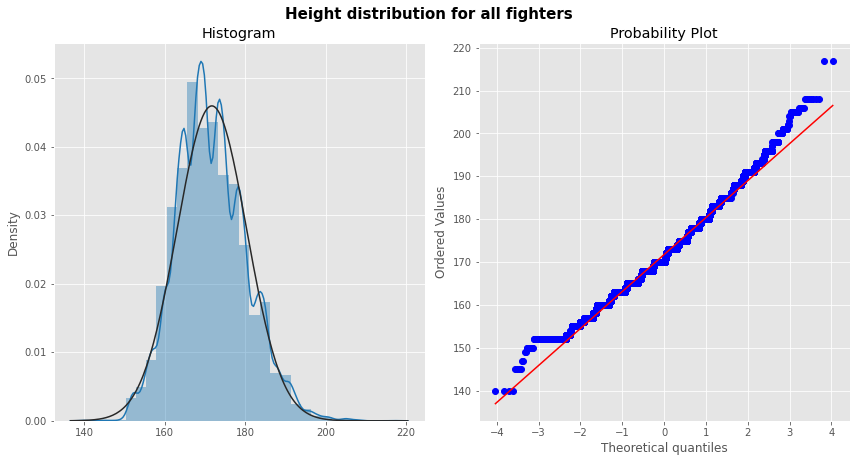

In [43]:
fights['height_y'] = fights.height_y.str.split().str[3].str.extract('(\d+)')
fights['height'] = pd.to_numeric(fights['height_y'], errors='coerce')

fights['height_x'] = fights.height_x.str.split().str[3].str.extract('(\d+)')
fights['height_opponent'] = pd.to_numeric(fights['height_x'], errors='coerce')
fights = fights.drop(["height_x","height_y"],axis=1)
fights = fights[fights.height > 100]
fights = fights[fights.height_opponent > 100]


from scipy import stats
from scipy.stats import norm
import seaborn as sns
fig = plt.figure(figsize=(12,12))

ax1 = fig.add_subplot(221,title='Histogram')
ax2 = fig.add_subplot(222)

sns.distplot(fights.height.append(fights.height_opponent), bins=30, ax=ax1,color='#1f77b4',fit=norm)
stats.probplot(fights.height.append(fights.height_opponent),plot=ax2,fit=True)

plt.suptitle('Height distribution for all fighters', fontsize=15, fontweight="bold")
plt.tight_layout()
plt.show()

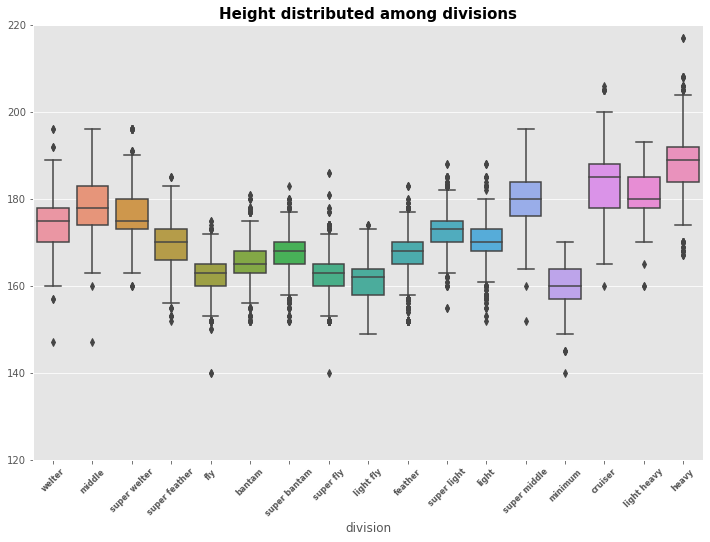

In [44]:
fig, ax = plt.subplots(1,1, figsize=(12,8))

sns.boxplot(x = fights.division, y=fights.height.append(fights.height_opponent))
plt.ylim(120,220)
plt.xticks(rotation=45,size=8,fontweight='bold')
ax.set_title('Height distributed among divisions', fontsize=15, fontweight='bold')

plt.show()

In [45]:
fights['Age_opponent'] = pd.to_numeric(fights[fights.born_x.notna()].born_x.str.split().str[3])
fights.drop("born_x",axis=1,inplace=True)

fights['Age'] = pd.to_numeric(fights[fights.born_y.notna()].born_y.str.split().str[3])
fights.drop("born_y",axis=1,inplace=True)

fights = fights[fights.Age < 80]

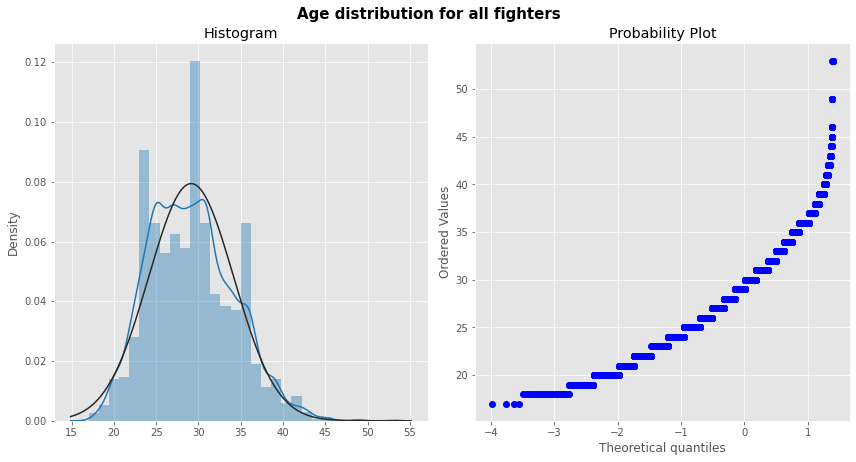

In [46]:
fig = plt.figure(figsize=(12,12))

ax1 = fig.add_subplot(221,title='Histogram')
ax2 = fig.add_subplot(222)

sns.distplot(fights.Age.append(fights.Age_opponent), bins=30, ax=ax1,color='#1f77b4',fit=norm)
stats.probplot(fights.Age.append(fights.Age_opponent),plot=ax2 ,fit=True)

plt.suptitle('Age distribution for all fighters', fontsize=15, fontweight="bold")
plt.tight_layout()
plt.show()

In [47]:
fights['group_bouts'] = pd.cut(x=pd.to_numeric(fights.bouts),bins=[0,10,20,30,40,100],labels=['0-10','10-20','20-30','30-40','50+'])


<AxesSubplot:xlabel='group_bouts', ylabel='Age'>

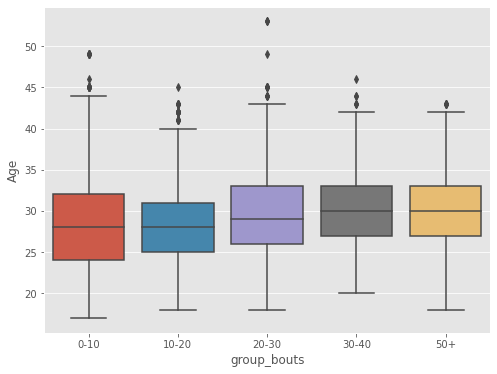

In [48]:
sns.boxplot(x = fights.group_bouts, y=fights.Age)

In [49]:
fights['group_bouts'] = pd.cut(x=pd.to_numeric(fights.bouts),bins=[5,10,15,20,25,30,35,40,45,70],labels=['0-5','5-10','15-20','20-25','25-30','30-35','35-40','40-45','50+'])


<AxesSubplot:xlabel='group_bouts', ylabel='Age'>

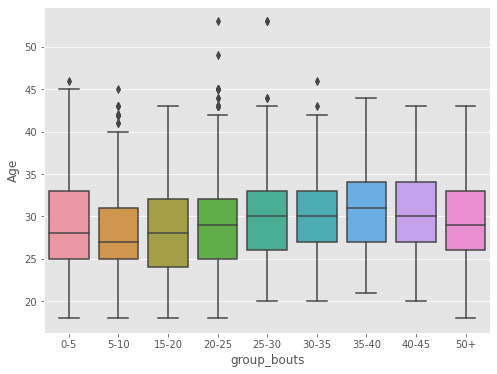

In [50]:
sns.boxplot(x = fights.group_bouts, y=fights.Age)

In [51]:
fights['Age'] = fights['Age'].fillna(fights.groupby('group_bouts')['Age'].transform("median"))

fights['Age_opponent'] = fights['Age_opponent'].fillna(fights.groupby('group_bouts')['Age_opponent'].transform("median"))

fights = fights.drop(["bouts","group_bouts"], axis=1,)

In [52]:
for x in fights['nationality_x'].str.split():
    if len(x) > 1:
        print (x)
    else:
        print (" There are no records with more than one country in it")
        break

 There are no records with more than one country in it


In [53]:
fights = fights[fights['w-l-d']!='w-l-d']


fights['w-l-d'] = np.where(fights['w-l-d']=="debut","0 0 0",fights['w-l-d'])

fights['opponent_wins'] = pd.to_numeric(fights['w-l-d'].str.split().str[0])
fights['opponent_losses'] = pd.to_numeric(fights['w-l-d'].str.split().str[1])
fights['opponent_draws'] = pd.to_numeric(fights['w-l-d'].str.split().str[2])


fights.drop('w-l-d',axis=1,inplace=True)

In [54]:
fights = fights[(fights['decision']=='W') | (fights['decision']=='L') | (fights['decision']=='D')]

decision = {'W':'Win','L':'Loss','D':'Draw' }

fights['decision'] = fights.decision.map(decision)

In [55]:
fights['nationality'] = fights.nationality_y
fights["nationality_opponent"] = fights.nationality_x

fights['stance'] = fights.stance_y
fights['stance_opponent'] = fights.stance_x


fights['debut'] = fights.debut_y
fights['debut_opponent'] = fights.debut_x

fights = fights.drop(["stance_y", "stance_x","nationality_x","nationality_y","opponent_br_id_x","opponent_br_id_y","debut_x","debut_y"],axis=1)

In [56]:
fights = fights.dropna()

In [57]:
print(f" There are {sum(fights.isnull().any())} columns that contains null values")

 There are 0 columns that contains null values


In [58]:
for col_name in fights[['draws',"losses",'wins']]:
    if(fights[col_name].dtype=='object'):
        fights[col_name] = pd.to_numeric(fights[col_name]) 

In [59]:
def bar_chart(x):
    win = fights[fights['decision']=='Win'][x].value_counts()
    loss = fights[fights['decision']=='Loss'][x].value_counts()
    draw = fights[fights['decision']=='Draw'][x].value_counts()
    df = pd.DataFrame([win,loss,draw])
    df.index = ['Win','Loss','Draw']
    df.plot(kind='bar', colormap="tab10")
    

fights['Age_groups'] = pd.cut(x=fights.Age,bins=[15.,20,24,28,32,36,40,60],labels=['16-20','20-24','24-28','28-32','32-26','36-40','40+'])
fights['height_groups'] = pd.cut(x=fights.height,bins=[150,160,170,180,190,200,220],labels=['150-160','160-170','170-180','180-190','190-200','200+'])

Text(0.5, 1.0, 'Results distributed among age groups')

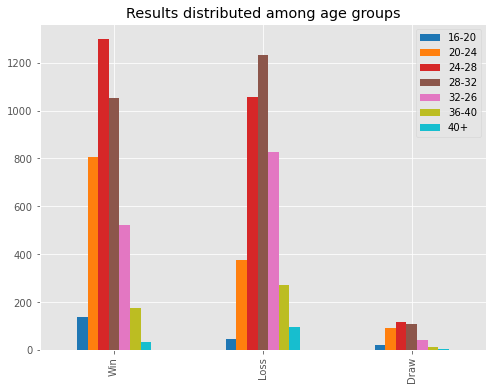

In [60]:
ax = bar_chart('Age_groups')
plt.title('Results distributed among age groups')


Text(0.5, 1.0, 'Result distributed among height groups')

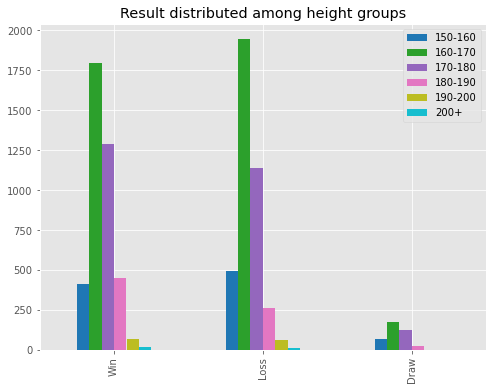

In [61]:
bar_chart('height_groups')
plt.title('Result distributed among height groups')

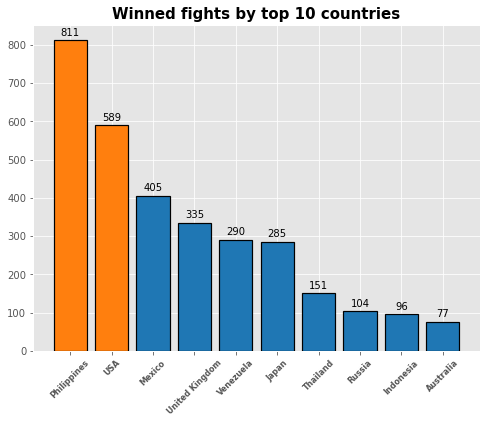

In [62]:
grouped_nations = fights[fights.decision=='Win'].groupby('nationality')['decision'].value_counts().unstack()
top_nations = pd.DataFrame(grouped_nations.sort_values(by='Win',ascending=False).head(10)).reset_index()
top_nations

fig, ax= plt.subplots(1,1)
colormap = ['#1f77b4' for i in range(10)]
colormap[0] = colormap[1] = '#ff7f0e'

plots = ax.bar(x=top_nations.nationality, height=top_nations.Win,
       color=colormap,
       width=0.8,
       edgecolor='black',
       linewidth=1.2)

ax.set_title('Winned fights by top 10 countries',
             fontsize=15,
             fontweight='bold')
plt.xticks(top_nations.nationality, rotation=45, size=8,fontweight='bold')


for bar in ax.patches:
    ax.annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center', xytext=(0,8),
                   textcoords='offset points')

plt.show()

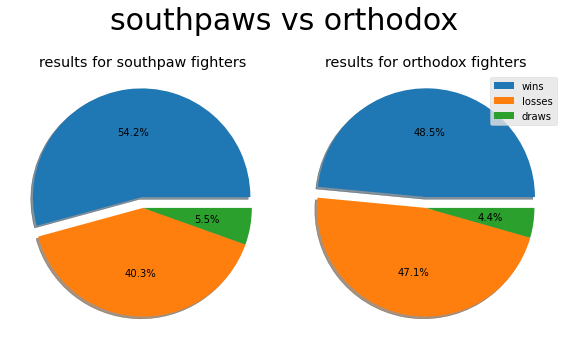

In [63]:
left = fights[fights.stance=='southpaw']
right = fights[fights.stance=='orthodox']


colors = ['#1f77b4', '#ff7f0e','#2ca02c']
explode = (0.1,0,0)
labels = ['wins','losses','draws']

fig = plt.figure()

ax1 = fig.add_subplot(221,title='results for southpaw fighters')
ax2 = fig.add_subplot(222, title='results for orthodox fighters')

ax1.pie(left.decision.value_counts(), colors=colors, explode=explode, shadow=True, autopct='%1.1f%%')
ax2.pie(right.decision.value_counts(), colors=colors, explode=explode, shadow=True, autopct='%1.1f%%')

plt.suptitle('southpaws vs orthodox', fontsize=30)
fig.subplots_adjust(top=4)
plt.legend(labels, loc="best")
plt.tight_layout()
plt.show()

In [32]:
orthodox = fights[fights.stance=="orthodox"]
southpaws = fights[fights.stance=="southpaw"]

In [35]:
def orth_bootstrap():
  list = []
  for i in range(500):
    orth_df = pd.DataFrame()
    sample_index = np.random.randint(low = 0, high = len(orthodox), size=200)
    
    for i in sample_index:
      orth_df = orth_df.append(orthodox.iloc[i])
      
    wins = len(orth_df[orth_df.decision=="Win"])
    list.append(wins)
    
  return list
    

In [36]:
orth_bootstrap = orth_bootstrap()

(array([  5.,  17.,  45.,  95., 106., 103.,  80.,  32.,  12.,   5.]),
 array([0.37  , 0.3905, 0.411 , 0.4315, 0.452 , 0.4725, 0.493 , 0.5135,
        0.534 , 0.5545, 0.575 ]),
 <BarContainer object of 10 artists>)

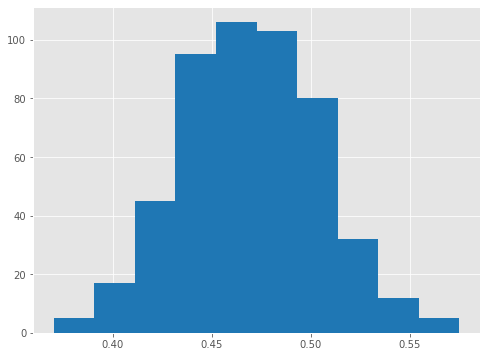

In [38]:
plt.hist(np.divide(orth_bootstrap,200), color="#1f77b4")

In [41]:
def south_bootstrap():
  list = []
  for i in range(500):
    south_df = pd.DataFrame()
    sample_index = np.random.randint(low = 0, high = len(southpaws), size=200)
    
    for i in sample_index:
      south_df = south_df.append(southpaws.iloc[i])
      
    wins = len(south_df[south_df.decision=="Win"])
    list.append(wins)
    
  return list

In [42]:
south_bootstrap = south_bootstrap()

(array([  5.,  18.,  45.,  71., 120., 103.,  76.,  39.,  21.,   2.]),
 array([0.89, 0.93, 0.97, 1.01, 1.05, 1.09, 1.13, 1.17, 1.21, 1.25, 1.29]),
 <BarContainer object of 10 artists>)

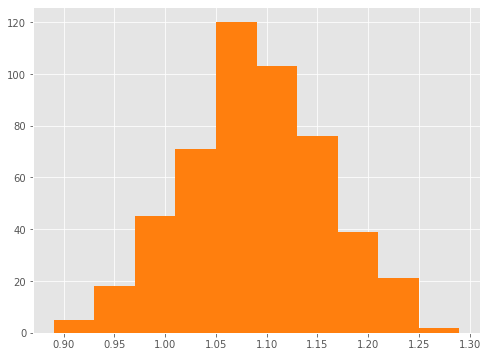

In [43]:
plt.hist(np.divide(south_bootstrap,100), color="#ff7f0e")

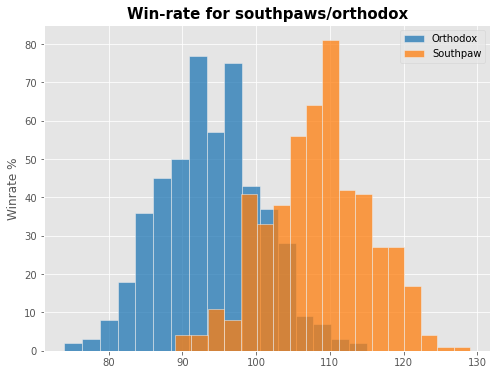

In [44]:
sns.histplot(orth_bootstrap, color="#1f77b4",)
sns.histplot(south_bootstrap, color="#ff7f0e")

plt.title('Win-rate for southpaws/orthodox', fontsize=15, fontweight="bold")
plt.ylabel("Winrate %")
plt.legend(("Orthodox", "Southpaw"))
plt.show()

Text(0.5, 1.0, 'Wins over time ')

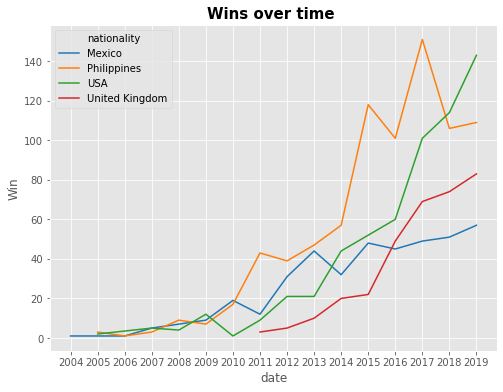

In [64]:
from datetime import datetime
from datetime import date

fights.date = pd.to_datetime(fights.date)
fights.date = fights.date.dt.strftime("%Y")

usa_phi = fights[(fights.nationality=="USA") | (fights.nationality=="Philippines") | (fights.nationality=="Mexico") | (fights.nationality=="United Kingdom")]
usa_phi = usa_phi.groupby(["date","nationality"])["decision"].value_counts().unstack().reset_index()

plots = sns.lineplot(data=usa_phi, x="date", y="Win", hue="nationality", palette="tab10")
plots.set_title('Wins over time ',fontsize=15,fontweight='bold')

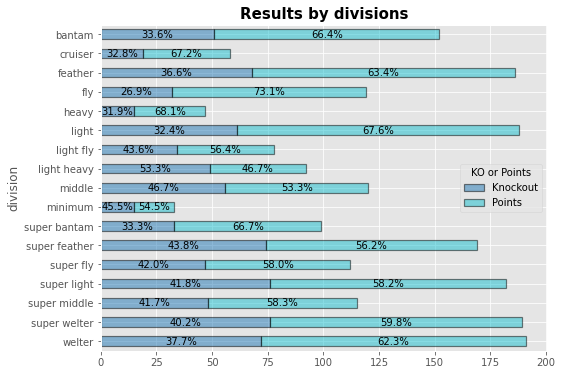

In [65]:
fights["KO or Points"] = pd.DataFrame(np.where((fights.result=="TKO")|(fights.result=="KO"), "Knockout", "Points"))

divtab = pd.crosstab(index=fights.division, columns=fights["KO or Points"]).sort_values(by='division',ascending=False)
plots = divtab.plot(kind='barh',stacked=True, colormap='tab10',alpha=0.5,edgecolor='black',linewidth=1.2)

plots.set_title('Results by divisions',
             fontsize=15,
             fontweight='bold')

df_total = divtab["Knockout"] + divtab["Points"]
df_rel = divtab[divtab.columns[0:]].div(df_total, 0)*100
  
for n in df_rel:
    for i, (cs, ab, pc) in enumerate(zip(divtab.iloc[:, 0:].cumsum(1)[n], 
                                         divtab[n], df_rel[n])):
        plt.text(cs - ab / 2, i, str(np.round(pc, 1)) + '%', 
                 va = 'center', ha = 'center')

plt.show()

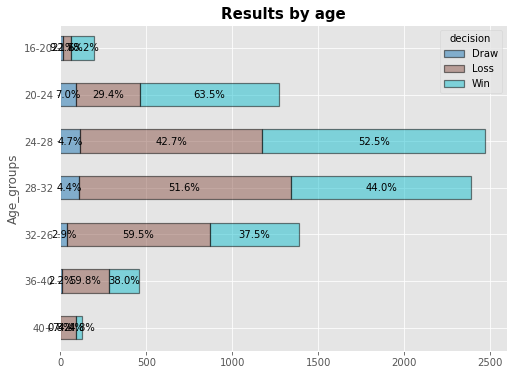

In [66]:
divtab = pd.crosstab(index=fights.Age_groups, columns=fights["decision"]).sort_values(by='Age_groups',ascending=False)
plots = divtab.plot(kind='barh',stacked=True, colormap='tab10',alpha=0.5,edgecolor='black',linewidth=1.2)

plots.set_title('Results by age',
             fontsize=15,
             fontweight='bold')

df_total = divtab["Win"] + divtab["Loss"] + divtab["Draw"]
df_rel = divtab[divtab.columns].div(df_total, 0)*100
  
for n in df_rel:
    for i, (cs, ab, pc) in enumerate(zip(divtab.iloc[:, 0:].cumsum(1)[n], 
                                         divtab[n], df_rel[n])):
        plt.text(cs - ab / 2, i, str(np.round(pc, 1)) + '%', 
                 va = 'center', ha = 'center')


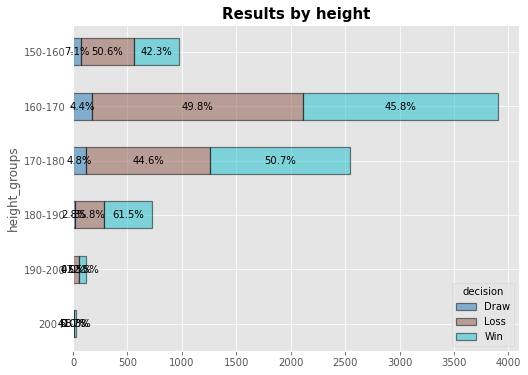

In [67]:
divtab = pd.crosstab(index=fights.height_groups, columns=fights["decision"]).sort_values(by='height_groups',ascending=False)
plots = divtab.plot(kind='barh',stacked=True, colormap='tab10',alpha=0.5,edgecolor='black',linewidth=1.2)

plots.set_title('Results by height',
             fontsize=15,
             fontweight='bold')

df_total = divtab["Win"] + divtab["Loss"] + divtab["Draw"]
df_rel = divtab[divtab.columns].div(df_total, 0)*100
  
for n in df_rel:
    for i, (cs, ab, pc) in enumerate(zip(divtab.iloc[:, 0:].cumsum(1)[n], 
                                         divtab[n], df_rel[n])):
        plt.text(cs - ab / 2, i, str(np.round(pc, 1)) + '%', 
                 va = 'center', ha = 'center')

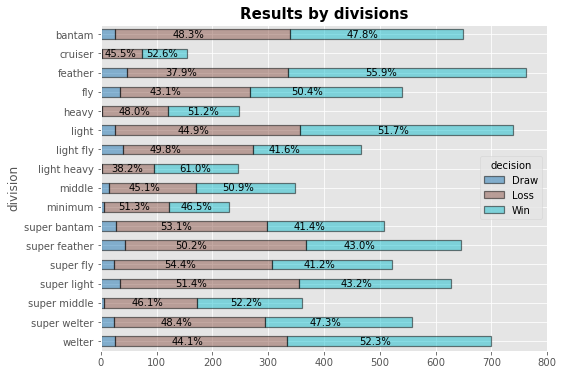

In [68]:
divtab = pd.crosstab(index=fights.division, columns=fights.decision).sort_values(by='division',ascending=False)
plots = divtab.plot(kind='barh',stacked=True, colormap='tab10',alpha=0.5,edgecolor='black',linewidth=1.2)

plots.set_title('Results by divisions',
             fontsize=15,
             fontweight='bold')

df_total = divtab["Win"] + divtab["Loss"] + divtab["Draw"]
df_rel = divtab[divtab.columns[1:]].div(df_total, 0)*100
  
for n in df_rel:
    for i, (cs, ab, pc) in enumerate(zip(divtab.iloc[:, 1:].cumsum(1)[n], 
                                         divtab[n], df_rel[n])):
        plt.text(cs - ab / 2, i, str(np.round(pc, 1)) + '%', 
                 va = 'center', ha = 'center')

plt.show()

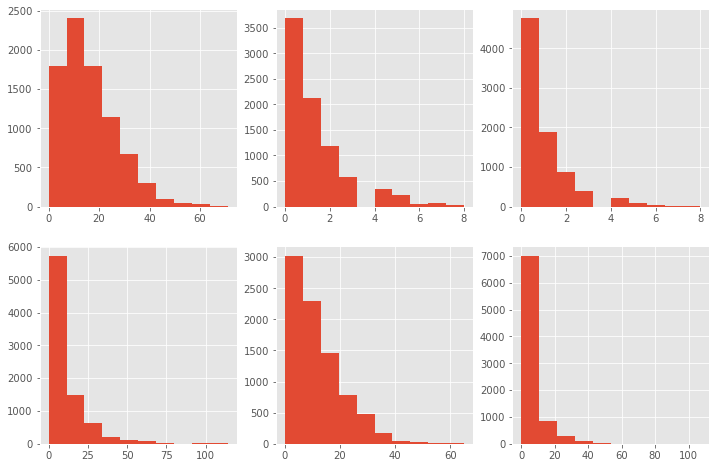

In [69]:
fig, ax = plt.subplots(2,3,figsize=(12,8))


ax[0,0].hist(fights.wins)
ax[0,1].hist(fights.draws)
ax[1,0].hist(fights.losses)
ax[1,1].hist(fights['opponent_wins'])
ax[0,2].hist(fights['opponent_draws'])
ax[1,2].hist(fights['opponent_losses'])

plt.show()

In [70]:
fights.drop(["Age_groups","height_groups","nationality","nationality_opponent"],axis=1,inplace=True)

In [71]:
debut = pd.to_numeric(fights.debut.str.split("-").str[0])
fights['debut_age'] = pd.to_numeric(debut - (2021-fights.Age))

debut_opponent = pd.to_numeric(fights.debut_opponent.str.split("-").str[0])
fights['debut_age_opponent'] = pd.to_numeric(debut_opponent - (2021-fights.Age_opponent))

<AxesSubplot:>

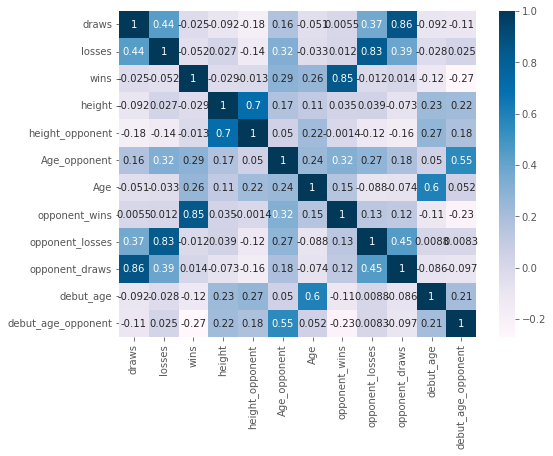

In [72]:
fights_corr = fights.drop(["result","decision","division"],axis=1).corr()
sns.heatmap(fights_corr, annot=True, cmap="PuBu")

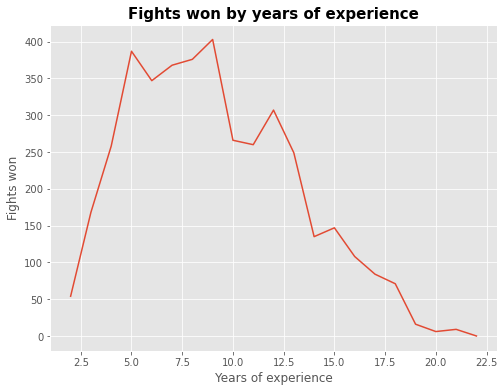

In [73]:
fights["years_experience"] = fights.Age - fights.debut_age
fights["Opponent_experience"] = fights.Age_opponent - fights.debut_age_opponent


divtab = pd.crosstab(index=fights["years_experience"], columns=fights.decision).reset_index()

sns.lineplot(x=divtab["years_experience"], y=divtab.Win)

plt.title("Fights won by years of experience", fontsize=15, fontweight="bold")
plt.ylabel("Fights won")
plt.xlabel("Years of experience")
plt.show()

In [74]:
fights["Height_Difference"] = fights.height - fights.height_opponent
fights["Experience_Difference"] = fights.years_experience - fights.Opponent_experience

fights.drop(["height","height_opponent","Age","Age_opponent","debut_age","debut_age_opponent","result","division","debut","KO or Points","debut_opponent","years_experience","Opponent_experience","date"],axis=1,inplace=True)

In [75]:
stance_map = {"southpaw":1, "orthodox":0}

fights.stance = fights.stance.map(stance_map)
fights.stance_opponent = fights.stance_opponent.map(stance_map)

### ML Pipeline

In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [83]:
train, test = train_test_split(fights, test_size=0.3, random_state=42)

X_train=train.drop('decision',axis=1)
y_train=train.decision

X_test=test.drop('decision',axis=1)
y_test= test.decision

In [84]:
forest_clf = RandomForestClassifier()

param_grid = [
    {'n_estimators':[3,10,30], 'max_features':[2,4,6,8]},
    {'bootstrap': [False], 'n_estimators':[3,10], 'max_features':[2,3,4]}
]

grid_search = GridSearchCV(forest_clf, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             scoring='accuracy')

In [85]:
feat = pd.Series(grid_search.best_estimator_.feature_importances_.round(3),list(X_train)).sort_values(ascending=False).head(12)
feat_df = pd.DataFrame(feat,columns=['Feature importance'])
feat_df

,Feature importance
losses,0.299
wins,0.147
opponent_losses,0.113
opponent_wins,0.112
Height_Difference,0.110
Experience_Difference,0.100
draws,0.051
opponent_draws,0.035
stance,0.018
stance_opponent,0.015


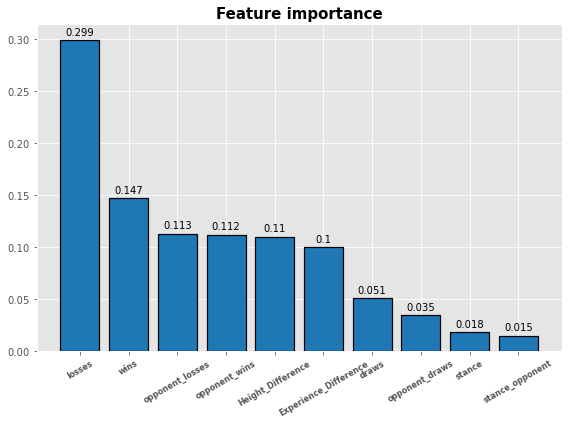

In [86]:
colormap = ['#1f77b4' for i in range(14)]
fig, ax= plt.subplots(1,1)

ax.bar(x=feat_df.index,height=feat_df['Feature importance'],
       color=colormap,
       width=0.8,
       edgecolor='black',
       linewidth=1.2)

ax.set_title('Feature importance',
             fontsize=15,
             fontweight='bold')

plt.xticks(rotation=30, size=8, fontweight='bold')

for bar in ax.patches:
    plt.annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center', xytext=(0,8),
                   textcoords='offset points')
plt.tight_layout()
plt.show()

In [87]:
model = grid_search.best_estimator_
pred = model.predict(X_test)

In [88]:
confusion_matrix(pred,y_test)

array([[  58,   11,    3],
       [  21, 1044,  135],
       [  34,  128, 1057]], dtype=int64)

<AxesSubplot:>

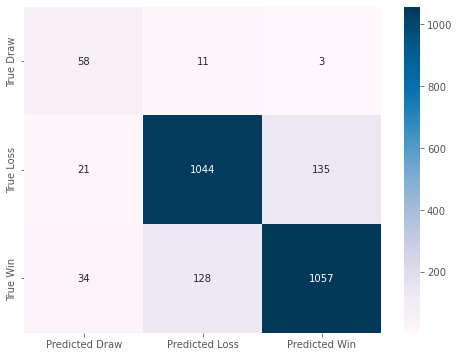

In [89]:
plt.figure()
columns = ['Predicted Draw', 'Predicted Loss', 'Predicted Win']
index=['True Draw', 'True Loss','True Win']
df = pd.DataFrame(confusion_matrix(pred,y_test), columns=columns, index=index)
sns.heatmap(df, annot=True, fmt='d', cmap='PuBu')

In [90]:
print(f" Accuracy: {accuracy_score(pred, y_test)}")

 Accuracy: 0.8667201926936973


In [91]:
fights.drop(["stance","stance_opponent","Experience_Difference"],axis=1,inplace=True)

train, test = train_test_split(fights, test_size=0.3, random_state=42)

X_train=train.drop('decision',axis=1)
y_train=train.decision

X_test=test.drop('decision',axis=1)
y_test= test.decision

In [92]:
forest_clf = RandomForestClassifier()

param_grid = [
    {'n_estimators':[3,10,30], 'max_features':[2,4,6,8]},
    {'bootstrap': [False], 'n_estimators':[3,10], 'max_features':[2,3,4]}
]

grid_search = GridSearchCV(forest_clf, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             scoring='accuracy')

<AxesSubplot:>

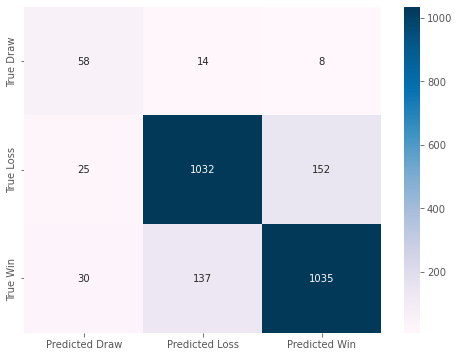

In [93]:
final_model = grid_search.best_estimator_
final_pred = final_model.predict(X_test)

plt.figure()
columns = ['Predicted Draw', 'Predicted Loss', 'Predicted Win']
index=['True Draw', 'True Loss','True Win']
df = pd.DataFrame(confusion_matrix(final_pred,y_test), columns=columns, index=index)
sns.heatmap(df, annot=True, fmt='d', cmap='PuBu')

In [94]:
print(f" Accuracy: {accuracy_score(final_pred, y_test)}")

 Accuracy: 0.8530710558008832


In [95]:
import pickle

pickle_file = open('model.pkl', 'ab')
pickle.dump(final_model, pickle_file)                     
pickle_file.close()

In [96]:
fights.to_csv("C:/Users/gabbe/Downloads/envs/boxing/csv-files/fights.csv")

In [97]:
fights

,decision,draws,losses,wins,opponent_wins,opponent_losses,opponent_draws,Height_Difference
6,Loss,0,0,26,23,0,0,2.0
7,Loss,0,0,26,23,0,0,2.0
8,Win,1,3,10,10,2,1,5.0
9,Win,1,3,10,10,2,1,5.0
10,Win,1,3,10,10,2,1,5.0
...,...,...,...,...,...,...,...,...
37343,Loss,0,1,5,1,1,0,-8.0
37399,Win,0,1,1,1,0,0,0.0
37400,Win,0,1,1,1,0,0,0.0
37493,Loss,0,0,3,1,0,0,-10.0
